<a href="https://colab.research.google.com/github/Ruthuvikas/sales_forcasting/blob/main/sales_forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy
import pandas
import matplotlib
import tqdm

!unzip -n /content/drive/MyDrive/walmart.zip
df = pandas.read_csv('Walmart Data Analysis and Forcasting.csv')

Archive:  /content/drive/MyDrive/walmart.zip


In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
unique_customer_types = df['Store'].unique()
print(unique_customer_types)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


EDA

Plot for avg weekly sales of each store

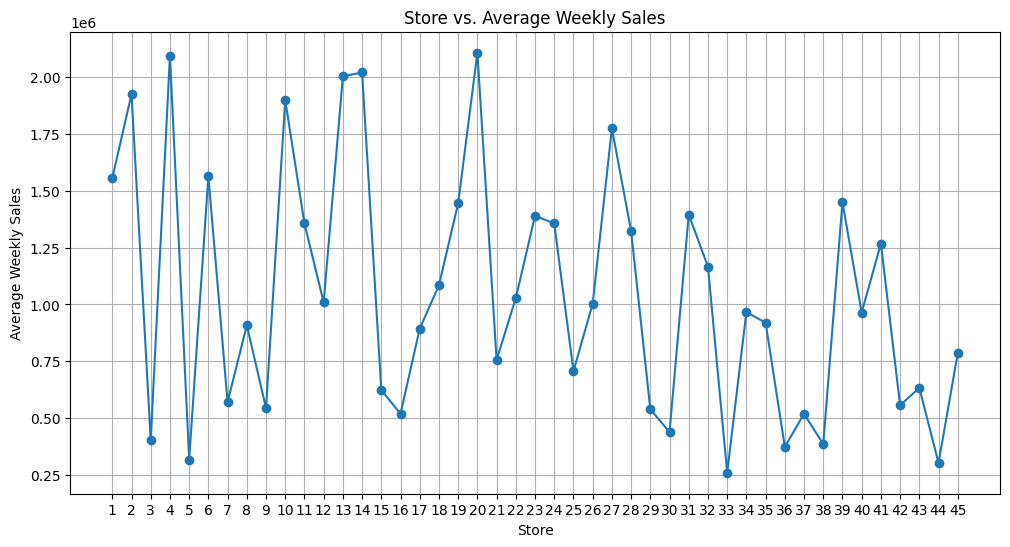

In [ ]:

import matplotlib.pyplot as plt

# Calculate average weekly sales for each store
avg_weekly_sales = df.groupby('Store')['Weekly_Sales'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(avg_weekly_sales.index, avg_weekly_sales.values, marker='o')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Store vs. Average Weekly Sales')
plt.xticks(avg_weekly_sales.index)  # Ensure all store numbers are displayed on x-axis
plt.grid(True)
plt.show()

In [ ]:
# Find the store with the highest average weekly sales
max_avg_sales_store = avg_weekly_sales.idxmax()
max_avg_sales_value = avg_weekly_sales.max()

print(f"The store with the highest average weekly sales is Store {max_avg_sales_store} with an average of {max_avg_sales_value:.2f}")

The store with the highest average weekly sales is Store 20 with an average of 2107676.87


In [ ]:
# Find the store with the highest average weekly sales
min_avg_sales_store = avg_weekly_sales.idxmin()
min_avg_sales_value = avg_weekly_sales.min()

print(f"The store with the lowest average weekly sales is Store {min_avg_sales_store} with an average of {min_avg_sales_value:.2f}")

The store with the lowest average weekly sales is Store 33 with an average of 259861.69


Plot for avg fuel price per store

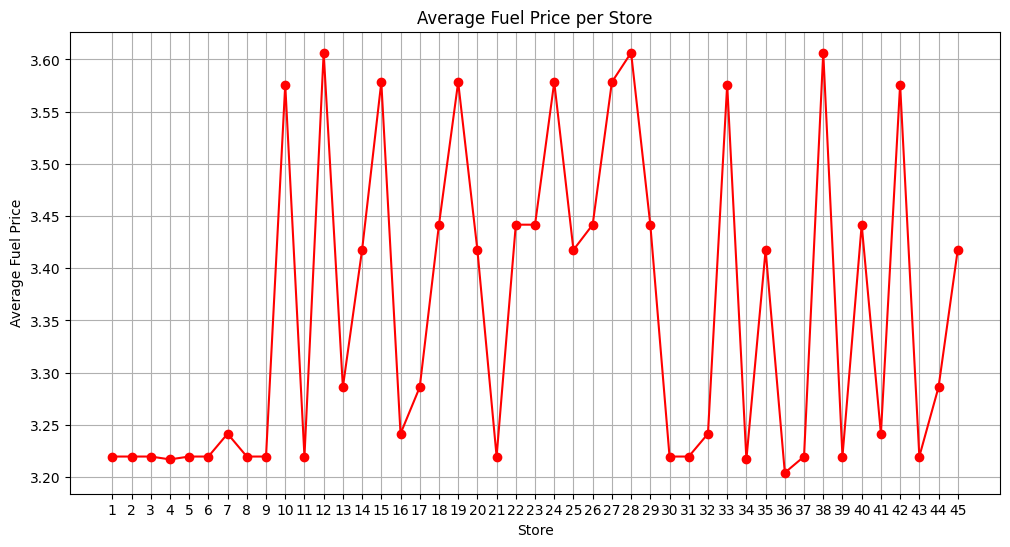

The store with the highest average fuel price is Store 12 with an average of 3.61
The store with the lowest average fuel price is Store 36 with an average of 3.20


In [ ]:

# Calculate average fuel price for each store
avg_fuel_price = df.groupby('Store')['Fuel_Price'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(avg_fuel_price.index, avg_fuel_price.values, marker='o', color='red')
plt.xlabel('Store')
plt.ylabel('Average Fuel Price')
plt.title('Average Fuel Price per Store')
plt.xticks(avg_fuel_price.index)  # Ensure all store numbers are displayed on x-axis
plt.grid(True)
plt.show()

# Find the store with the highest average fuel price
max_avg_fuel_store = avg_fuel_price.idxmax()
max_avg_fuel_value = avg_fuel_price.max()

print(f"The store with the highest average fuel price is Store {max_avg_fuel_store} with an average of {max_avg_fuel_value:.2f}")

# Find the store with the lowest average fuel price
min_avg_fuel_store = avg_fuel_price.idxmin()
min_avg_fuel_value = avg_fuel_price.min()

print(f"The store with the lowest average fuel price is Store {min_avg_fuel_store} with an average of {min_avg_fuel_value:.2f}")

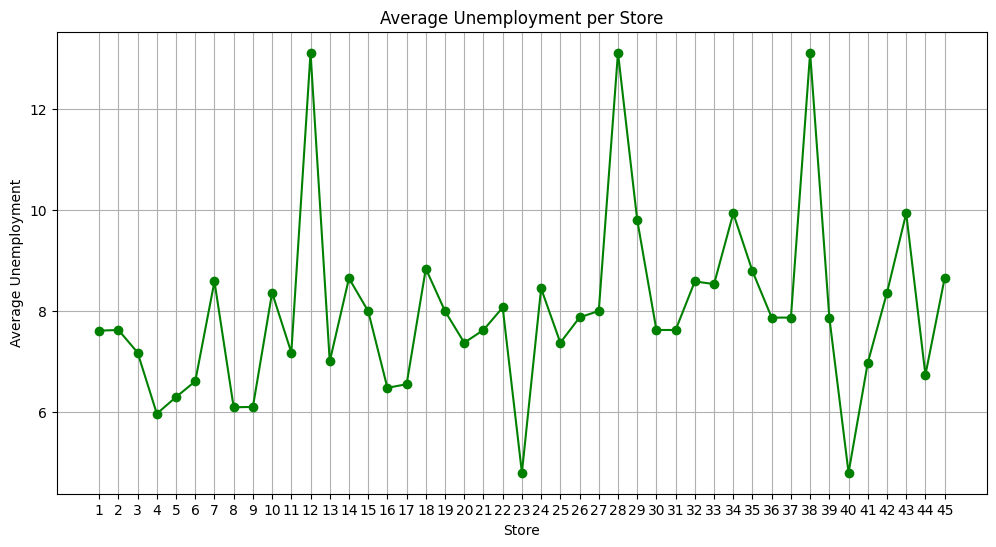

The store with the highest average unemployment is Store 12 with an average of 13.12
The store with the lowest average unemployment is Store 23 with an average of 4.80


In [ ]:
# prompt: plot for avg Unemployment vs store

# Calculate average unemployment for each store
avg_unemployment = df.groupby('Store')['Unemployment'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(avg_unemployment.index, avg_unemployment.values, marker='o', color='green')
plt.xlabel('Store')
plt.ylabel('Average Unemployment')
plt.title('Average Unemployment per Store')
plt.xticks(avg_unemployment.index)  # Ensure all store numbers are displayed on x-axis
plt.grid(True)
plt.show()

# Find the store with the highest average unemployment
max_avg_unemployment_store = avg_unemployment.idxmax()
max_avg_unemployment_value = avg_unemployment.max()

print(f"The store with the highest average unemployment is Store {max_avg_unemployment_store} with an average of {max_avg_unemployment_value:.2f}")

# Find the store with the lowest average unemployment
min_avg_unemployment_store = avg_unemployment.idxmin()
min_avg_unemployment_value = avg_unemployment.min()

print(f"The store with the lowest average unemployment is Store {min_avg_unemployment_store} with an average of {min_avg_unemployment_value:.2f}")

In [ ]:
# prompt: find the correlation with avg unemployment and avg sales per store

import pandas as pd

# Assuming 'df' is your DataFrame as defined in the previous code

# Calculate the correlation between average unemployment and average weekly sales per store
correlation = df.groupby('Store').agg({'Unemployment': 'mean', 'Weekly_Sales': 'mean'}).corr()

correlation

,Unemployment,Weekly_Sales
Unemployment,1.000000,-0.112281
Weekly_Sales,-0.112281,1.000000


In [ ]:

# Calculate the correlation between average fuel price and average weekly sales per store
correlation_fuel_sales = df.groupby('Store').agg({'Fuel_Price': 'mean', 'Weekly_Sales': 'mean'}).corr()

correlation_fuel_sales

,Fuel_Price,Weekly_Sales
Fuel_Price,1.000000,0.067734
Weekly_Sales,0.067734,1.000000


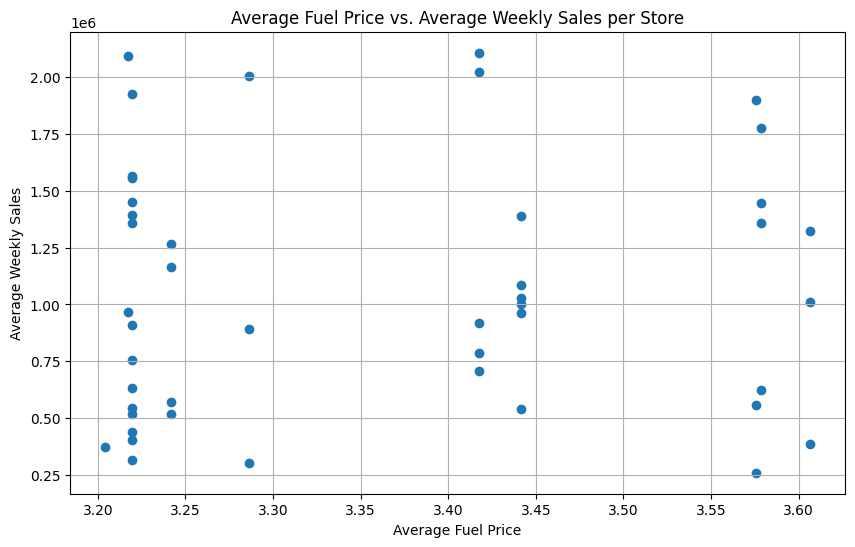

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(avg_fuel_price, avg_weekly_sales)
plt.xlabel('Average Fuel Price')
plt.ylabel('Average Weekly Sales')
plt.title('Average Fuel Price vs. Average Weekly Sales per Store')
plt.grid(True)
plt.show()

Plot for Holiday vs Avg Sales per Store

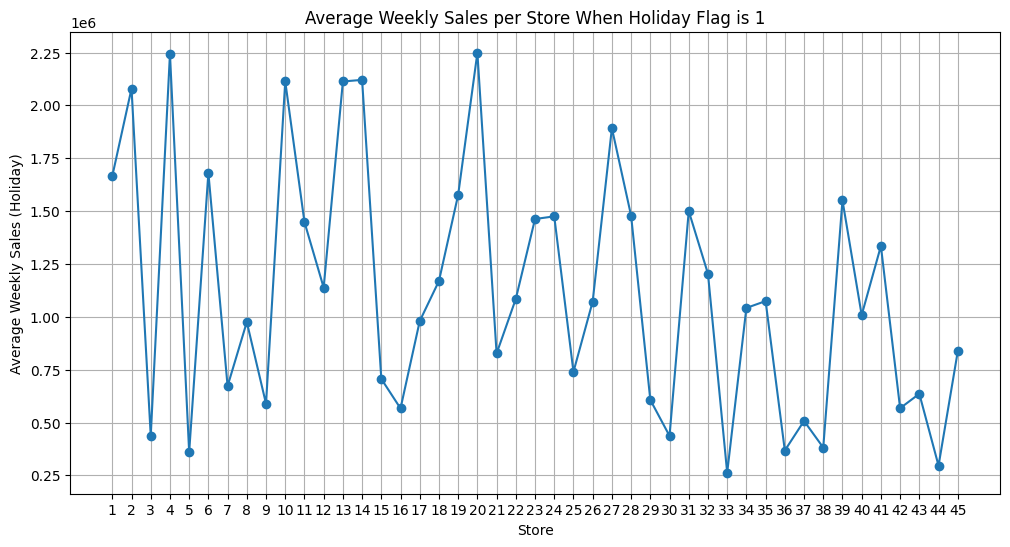

Maximum average weekly sales on a holiday: 2249035.08
Minimum average weekly sales on a holiday: 262594.52


In [ ]:
# prompt: plot for avg sales per store vs holiday flag set to 1 per store also print max and min sales

# Group data by store and holiday flag, then calculate the average weekly sales
holiday_sales = df.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].mean().reset_index()

# Filter for holiday flag set to 1
holiday_sales_1 = holiday_sales[holiday_sales['Holiday_Flag'] == 1]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(holiday_sales_1['Store'], holiday_sales_1['Weekly_Sales'], marker='o')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales (Holiday)')
plt.title('Average Weekly Sales per Store When Holiday Flag is 1')
plt.xticks(holiday_sales_1['Store'])
plt.grid(True)
plt.show()

# Print max and min sales for holiday
max_sales = holiday_sales_1['Weekly_Sales'].max()
min_sales = holiday_sales_1['Weekly_Sales'].min()

print(f"Maximum average weekly sales on a holiday: {max_sales:.2f}")
print(f"Minimum average weekly sales on a holiday: {min_sales:.2f}")

Plot for non holidays

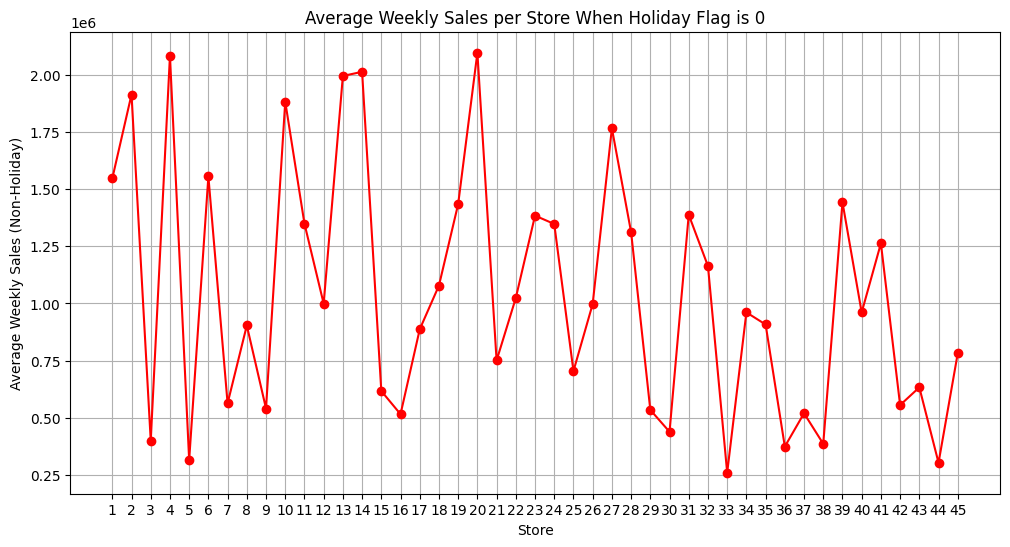

Maximum average weekly sales on a non-holiday: 2097048.43
Minimum average weekly sales on a non-holiday: 259656.22


In [ ]:
# prompt: plot for avg sales per store vs holiday flag set to 0 per store also print max and min sales

# Filter for holiday flag set to 0
holiday_sales_0 = holiday_sales[holiday_sales['Holiday_Flag'] == 0]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(holiday_sales_0['Store'], holiday_sales_0['Weekly_Sales'], marker='o', color='red')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales (Non-Holiday)')
plt.title('Average Weekly Sales per Store When Holiday Flag is 0')
plt.xticks(holiday_sales_0['Store'])
plt.grid(True)
plt.show()

# Print max and min sales for non-holidays
max_sales_0 = holiday_sales_0['Weekly_Sales'].max()
min_sales_0 = holiday_sales_0['Weekly_Sales'].min()

print(f"Maximum average weekly sales on a non-holiday: {max_sales_0:.2f}")
print(f"Minimum average weekly sales on a non-holiday: {min_sales_0:.2f}")

In [ ]:
# prompt: correlation between avg unemployment vs avg sales per store

# Assuming 'df' is your DataFrame as defined in the previous code

# Calculate the correlation between average unemployment and average weekly sales per store
correlation = df.groupby('Store').agg({'Unemployment': 'mean', 'Weekly_Sales': 'mean'}).corr()

correlation

,Unemployment,Weekly_Sales
Unemployment,1.000000,-0.112281
Weekly_Sales,-0.112281,1.000000


Plot for Date vs Unemployment

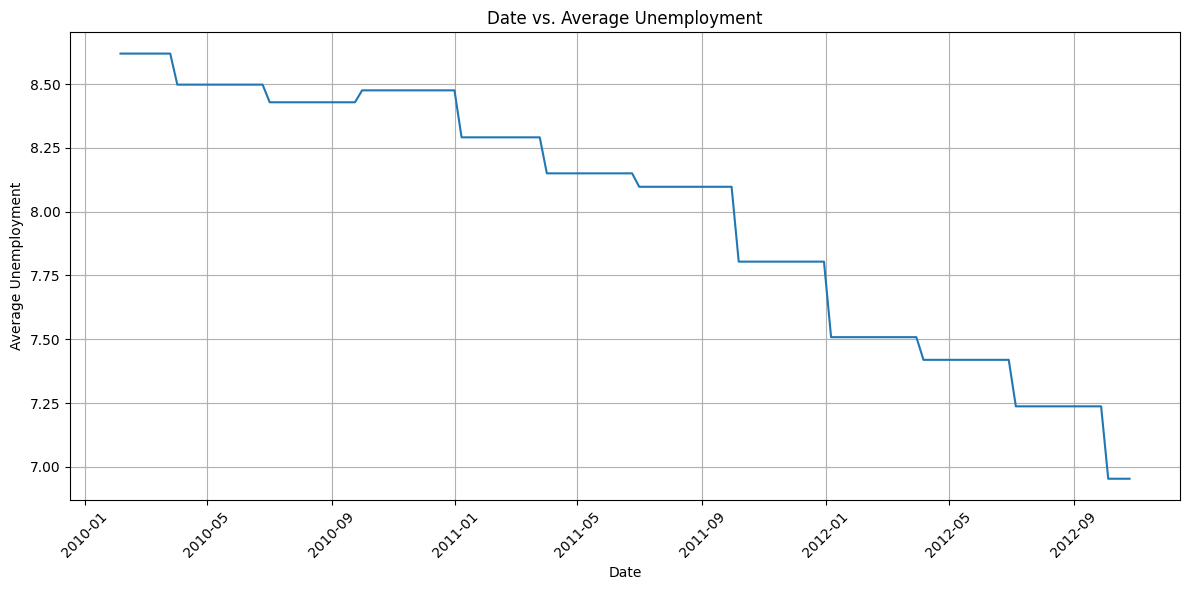

In [ ]:
# Convert the 'Date' column to datetime objects, specifying the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Group data by date and calculate the average unemployment rate
avg_unemployment_by_date = df.groupby('Date')['Unemployment'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(avg_unemployment_by_date.index, avg_unemployment_by_date.values)
plt.xlabel('Date')
plt.ylabel('Average Unemployment')
plt.title('Date vs. Average Unemployment')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Plot for Date vs CPI

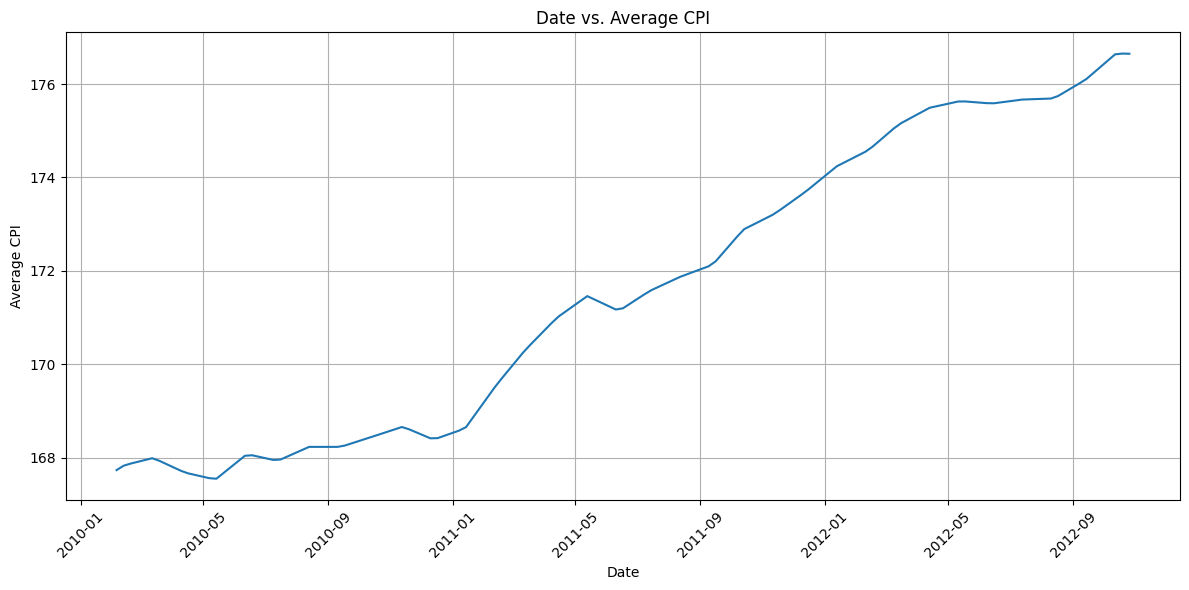

In [ ]:
# prompt: Plot for Date vs CPI

# Convert the 'Date' column to datetime objects, specifying the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Group data by date and calculate the average CPI
avg_cpi_by_date = df.groupby('Date')['CPI'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(avg_cpi_by_date.index, avg_cpi_by_date.values)
plt.xlabel('Date')
plt.ylabel('Average CPI')
plt.title('Date vs. Average CPI')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Creating time series data

In [ ]:
# 1. Create sales_ts, including other columns in the aggregation
sales_ts = df.groupby(['Date'])[['Weekly_Sales', 'Fuel_Price', 'CPI', 'Unemployment']].mean().reset_index()
sales_ts['Date'] = pd.to_datetime(sales_ts['Date'])

# 2. Get unique dates and corresponding values from df for 'Holiday_Flag' (cannot be summed)
date_values = df.groupby('Date')['Holiday_Flag'].first().reset_index()

# 3. Merge sales_ts with date_values to add 'Holiday_Flag'
sales_ts = pd.merge(sales_ts, date_values, on='Date', how='left')

# 4. Rename for Prophet
sales_ts = sales_ts.rename(columns={'Date': 'ds',
                                     'Weekly_Sales': 'y',
                                     'Holiday_Flag': 'holiday',
                                     'Fuel_Price': 'fuel_price',
                                     'CPI': 'cpi',
                                     'Unemployment': 'unemployment'})

# 5. Set 'ds' as index for Prophet
sales_ts = sales_ts.set_index('ds')

# Now, 'sales_ts' is ready for forecasting with Prophet

In [ ]:
sales_ts.head()

,y,fuel_price,cpi,unemployment,holiday
ds,,,,,
2010-02-05,1.105572e+06,2.717844,167.730885,8.619311,0
2010-02-12,1.074148e+06,2.694022,167.825608,8.619311,1
2010-02-19,1.072822e+06,2.672067,167.871686,8.619311,0
2010-02-26,9.770794e+05,2.683933,167.909657,8.619311,0
2010-03-05,1.041588e+06,2.731200,167.947628,8.619311,0


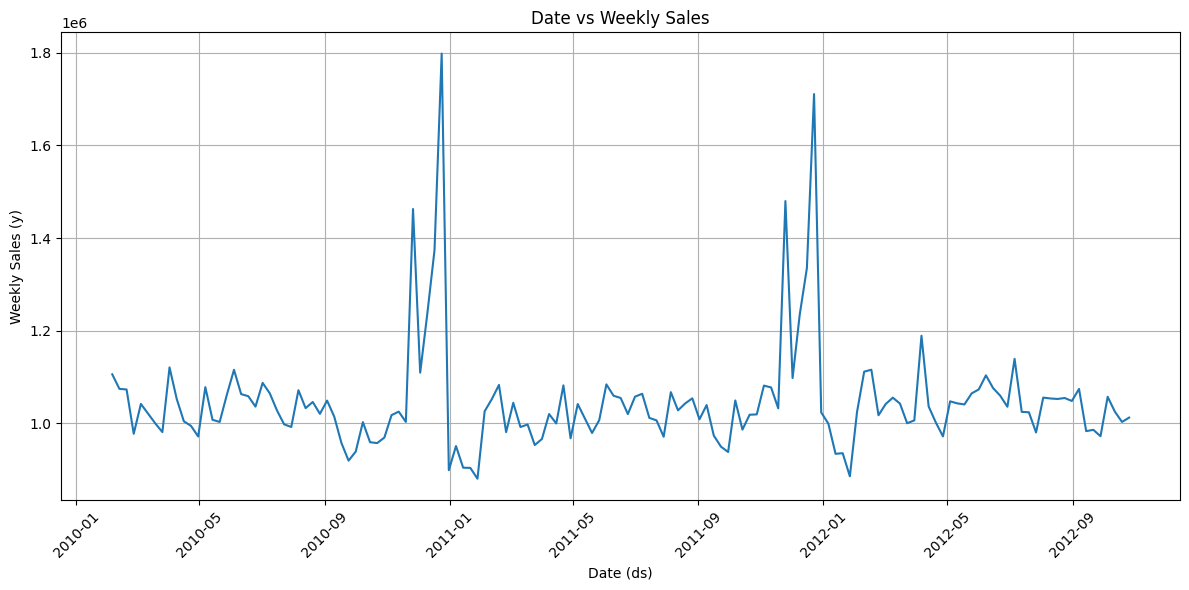

In [ ]:
# prompt: plot ds vs y

import matplotlib.pyplot as plt

# Assuming 'sales_ts' DataFrame is already created as in your provided code

plt.figure(figsize=(12, 6))
plt.plot(sales_ts.index, sales_ts['y'])
plt.xlabel('Date (ds)')
plt.ylabel('Weekly Sales (y)')
plt.title('Date vs Weekly Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Prophet Forcasting Model

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgum3b00/rjhhz6zc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgum3b00/y9vsfy4e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31187', 'data', 'file=/tmp/tmpbgum3b00/rjhhz6zc.json', 'init=/tmp/tmpbgum3b00/y9vsfy4e.json', 'output', 'file=/tmp/tmpbgum3b00/prophet_modelgdinkb13/prophet_model-20250111001248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:12:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds           yhat     yhat_lower     yhat_upper
503 2013-10-22  867734.713143  768711.974801  971903.303254
504 2013-10-23  867635.395063  771990.238724  961350.003709
505 2013-10-24  868435.606480  769421.784615  970728.626450
506 2013-10-25  870194.408582  767455.886590  968185.247900
507 2013-10-26  872948.129067  773575.659685  960371.989469


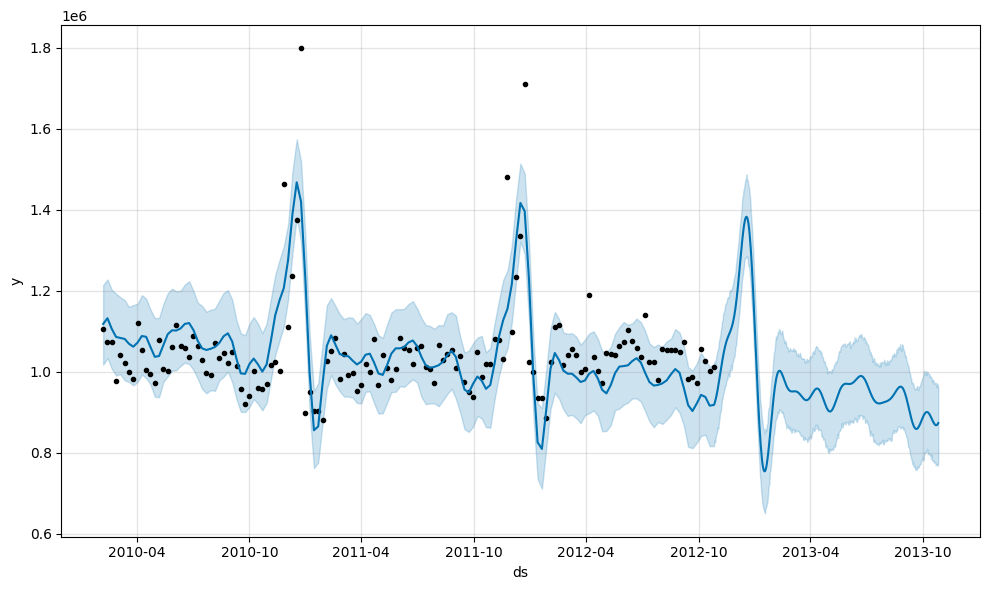

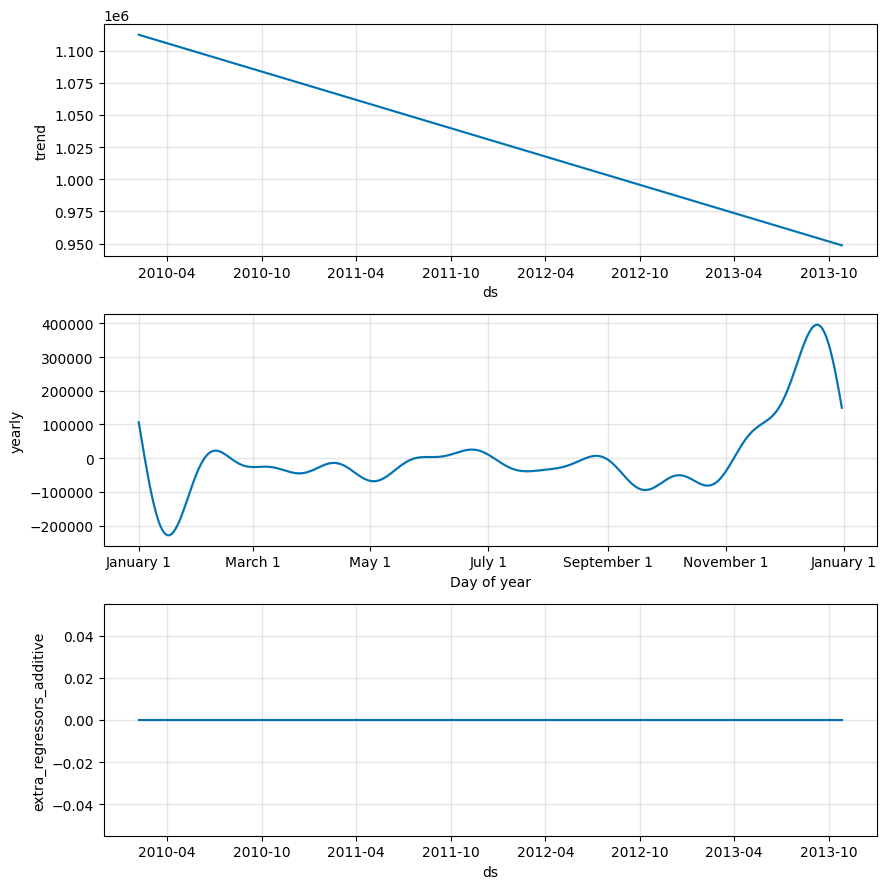

In [ ]:

from prophet import Prophet

# Create and fit the Prophet model
model = Prophet()
model.add_regressor('fuel_price')
model.add_regressor('cpi')
model.add_regressor('unemployment')
model.add_regressor('holiday')
model.fit(sales_ts.reset_index())

# Create a future DataFrame for forecasting
future = model.make_future_dataframe(periods=365) # Forecast for the next year
future['fuel_price'] = sales_ts['fuel_price'].mean()  # Replace with your actual fuel price data for future
future['cpi'] = sales_ts['cpi'].mean()            # Replace with your actual CPI data for future
future['unemployment'] = sales_ts['unemployment'].mean() # Replace with your actual unemployment data for future
future['holiday'] = 0  # Assuming no holidays in the future period

# Make predictions
forecast = model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
fig1 = model.plot(forecast)
plt.show()

# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()